In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve,GridSearchCV

In [2]:
train_x = pd.read_table('/home/cmpe/CS/SE/SJSU/cmpe256/UCI HAR Dataset/train/X_train.txt', delim_whitespace = True, header = None)

test_x = pd.read_table('/home/cmpe/CS/SE/SJSU/cmpe256/UCI HAR Dataset/test/X_test.txt', delim_whitespace = True, header = None)

In [3]:
train_y = pd.read_table('/home/cmpe/CS/SE/SJSU/cmpe256/UCI HAR Dataset/train/y_train.txt', header = None)

test_y = pd.read_table('/home/cmpe/CS/SE/SJSU/cmpe256/UCI HAR Dataset/test/y_test.txt', header = None)

In [4]:
train_x.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [5]:
rfc = RandomForestClassifier()

In [6]:
n_estimators_list = [10, 100, 1000]
max_depth_list = [int(x) for x in np.linspace(3, 9, num = 3)]
max_features_list = ['auto', 'log2']

params_grid = {'n_estimators': n_estimators_list, 'max_depth': max_depth_list, 'max_features' : max_features_list}

print(params_grid)

{'n_estimators': [10, 100, 1000], 'max_depth': [3, 6, 9], 'max_features': ['auto', 'log2']}


In [7]:
model = GridSearchCV(estimator = rfc, param_grid = params_grid, n_jobs = -1, cv = 4, scoring = 'accuracy', verbose = 4)
model.fit(train_x.values, train_y.values.ravel().T)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  7.3min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [8]:
from sklearn.metrics import accuracy_score
pred_y = model.predict(test_x)
accuracy = accuracy_score(test_y, pred_y)

accuracy_list = [round(accuracy, 4)]
print(accuracy_list)

[0.9253]


In [9]:
print (f"Best Parameters: {str(model.best_params_)}")
print (f"Accuracy Score : {accuracy_list[0] * 100}%") 

Best Parameters: {'max_depth': 9, 'max_features': 'log2', 'n_estimators': 1000}
Accuracy Score : 92.53%


In [10]:
n_estimators_list = [int(x) for x in np.linspace(100, 1000, num = 3)]
max_depth_list = [int(x) for x in np.linspace(3, 9, num = 3)]
max_features_list = ['auto', 'log2']

params_grid = {'n_estimators': n_estimators_list, 'max_depth': max_depth_list, 'max_features' : max_features_list}

print(params_grid)

{'n_estimators': [100, 550, 1000], 'max_depth': [3, 6, 9], 'max_features': ['auto', 'log2']}


In [11]:
model = GridSearchCV(estimator = rfc, param_grid = params_grid, n_jobs = -1, cv = 4, scoring = 'accuracy', verbose = 4)
model.fit(train_x.values, train_y.values.ravel().T)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 10.0min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [12]:
from sklearn.metrics import accuracy_score
pred_y = model.predict(test_x)
accuracy = accuracy_score(test_y, pred_y)

accuracy_list.append(round(accuracy, 4))
print(accuracy_list)

[0.9253, 0.9243]


In [13]:
print (f"Best Parameters: {str(model.best_params_)}")
print (f"Accuracy Score : {accuracy_list[1] * 100}%") 

Best Parameters: {'max_depth': 9, 'max_features': 'log2', 'n_estimators': 550}
Accuracy Score : 92.43%


In [14]:
n_estimators_list = [int(x) for x in np.linspace(100, 1000, num = 4)]
max_depth_list = [int(x) for x in np.linspace(3, 12, num = 3)]
max_features_list = ['auto', 'log2']

params_grid = {'n_estimators': n_estimators_list, 'max_depth': max_depth_list, 'max_features' : max_features_list}

print(params_grid)

{'n_estimators': [100, 400, 700, 1000], 'max_depth': [3, 7, 12], 'max_features': ['auto', 'log2']}


In [15]:
model = GridSearchCV(estimator = rfc, param_grid = params_grid, n_jobs = -1, cv = 4, scoring = 'accuracy', verbose = 4)
model.fit(train_x.values, train_y.values.ravel().T)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 14.2min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [16]:
from sklearn.metrics import accuracy_score
pred_y = model.predict(test_x)
accuracy = accuracy_score(test_y, pred_y)

accuracy_list.append(round(accuracy, 4))
print(accuracy_list)

[0.9253, 0.9243, 0.9338]


In [17]:
print (f"Best Parameters: {str(model.best_params_)}")
print (f"Accuracy Score : {accuracy_list[2] * 100}%") 

Best Parameters: {'max_depth': 12, 'max_features': 'log2', 'n_estimators': 1000}
Accuracy Score : 93.38%


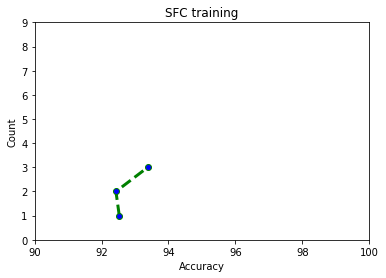

In [19]:
import matplotlib.pyplot as plt

percentage_list = [p * 100 for p in accuracy_list]

# setting the corresponding y - coordinates 
y = [i + 1 for i in range(len(accuracy_list))]
  
# potting the points 
plt.plot(percentage_list, y, color = 'green', linestyle = 'dashed', linewidth = 3, 
         marker = 'o', markerfacecolor = 'blue', markersize = 6)

plt.ylim(0, 9) 
plt.xlim(90, 100) 

# naming the x axis 
plt.xlabel('Accuracy') 
# naming the y axis 
plt.ylabel('Count')

plt.title('SFC training')
  
# function to show the plot 
plt.show() 